<a href="https://colab.research.google.com/github/warwizz/DA-DS/blob/main/creditautomation/Final_Project_Credit_Scoring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings("ignore")

In [ ]:
! pip install matplotlib --upgrade

# Import Data

In [ ]:
data = pd.read_csv('hmeq.csv')

In [ ]:
data.sample(10)

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
1899,0,12600,84933.0,110253.0,DebtCon,ProfExe,8.0,0.0,0.0,192.422606,1.0,37.0,40.845078
5409,0,31500,49020.0,100700.0,DebtCon,Office,4.0,0.0,0.0,169.689039,1.0,25.0,36.034645
4254,0,22200,138584.0,180415.0,DebtCon,ProfExe,5.0,NaN,NaN,195.632808,4.0,43.0,41.205399
2076,0,13100,82411.0,103833.0,HomeImp,Other,21.0,0.0,0.0,135.863038,4.0,24.0,29.215827
1650,0,11800,NaN,65769.0,HomeImp,Other,NaN,0.0,0.0,357.332682,0.0,7.0,34.327277
4069,0,21300,145324.0,179995.0,DebtCon,ProfExe,5.0,NaN,NaN,199.476735,5.0,42.0,39.839640
1319,0,10500,57372.0,67960.0,DebtCon,ProfExe,1.5,0.0,0.0,158.266667,2.0,35.0,NaN
1712,1,12000,69000.0,92900.0,HomeImp,ProfExe,2.0,0.0,0.0,115.900000,0.0,15.0,NaN
2826,0,15800,101246.0,142340.0,DebtCon,Office,2.0,NaN,NaN,109.293933,2.0,16.0,33.770829
3703,1,19500,47000.0,70000.0,DebtCon,Mgr,15.0,0.0,0.0,220.166667,5.0,21.0,NaN


# Data Quality Checking

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


In [ ]:
data.duplicated().sum()

0

In [ ]:
data.isnull().sum()

BAD           0
LOAN          0
MORTDUE     518
VALUE       112
REASON      252
JOB         279
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64

In [ ]:
data.shape

(5960, 13)

In [ ]:
data.columns

Index(['BAD', 'LOAN', 'MORTDUE', 'VALUE', 'REASON', 'JOB', 'YOJ', 'DEROG',
       'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC'],
      dtype='object')

In [ ]:
cat = ['REASON','JOB']
num = ['BAD', 'LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG',
       'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC']

In [ ]:
data[cat].describe()

,REASON,JOB
count,5708,5681
unique,2,6
top,DebtCon,Other
freq,3928,2388


In [ ]:
# Pada bagian reason, data sudah cocok karena memang hanya ada 2 value
# Alasan terbanyak mengajukan kredit adalah untuk membayar hutang sebanyak 3928 ajuan
# Pada bagian pekerjaan, data sudah cocok karena memang ada 6 value
# Pekerjaan terbanyak adalah 'other'

In [ ]:
data[num].describe()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,5960.000000,5960.000000,5442.000000,5848.000000,5445.000000,5252.000000,5380.000000,5652.000000,5450.000000,5738.000000,4693.000000
mean,0.199497,18607.969799,73760.817200,101776.048741,8.922268,0.254570,0.449442,179.766275,1.186055,21.296096,33.779915
std,0.399656,11207.480417,44457.609458,57385.775334,7.573982,0.846047,1.127266,85.810092,1.728675,10.138933,8.601746
min,0.000000,1100.000000,2063.000000,8000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524499
25%,0.000000,11100.000000,46276.000000,66075.500000,3.000000,0.000000,0.000000,115.116702,0.000000,15.000000,29.140031
50%,0.000000,16300.000000,65019.000000,89235.500000,7.000000,0.000000,0.000000,173.466667,1.000000,20.000000,34.818262
75%,0.000000,23300.000000,91488.000000,119824.250000,13.000000,0.000000,0.000000,231.562278,2.000000,26.000000,39.003141
max,1.000000,89900.000000,399550.000000,855909.000000,41.000000,10.000000,15.000000,1168.233561,17.000000,71.000000,203.312149


In [ ]:
# Median loan lebih besar dari rata2nya sehingga fitur ini memiliki distribusi menyimpang
# Median mortdue lebih kecil dari rata2nya sehingga fitur ini memiliki distribusi menyimpang
# Median value lebih kecil dari rata2nya sehingga fitur ini memiliki distribusi menyimpang
# Median YOJ lebih kecil dari rata2nya sehingga fitur ini memiliki distribusi menyimpang
# Median derog lebih kecil dari rata2nya sehingga fitur ini memiliki distribusi menyimpang
# Median delinq lebih kecil dari rata2nya sehingga fitur ini memiliki distribusi menyimpang
# Median derog lebih kecil dari rata2nya sehingga fitur ini memiliki distribusi menyimpang
# Median clage memiliki nilai yang mirip dengan rata2nya sehingga fitur ini memiliki distribusi normal
# Median ninq memiliki nilai yang mirip dengan rata2nya sehingga fitur ini memiliki distribusi normal
# Median clno memiliki nilai yang mirip dengan rata2nya sehingga fitur ini memiliki distribusi normal
# Median debtinc memiliki nilai yang mirip dengan rata2nya sehingga fitur ini memiliki distribusi normal

# Handle Missing Value

In [ ]:
for column in data:
  print('Persentase data null pada kolom', 
        column,':', round(100*data.isnull().sum()[column]/data.shape[0],2), '%')

Persentase data null pada kolom BAD : 0.0 %
Persentase data null pada kolom LOAN : 0.0 %
Persentase data null pada kolom MORTDUE : 8.69 %
Persentase data null pada kolom VALUE : 1.88 %
Persentase data null pada kolom REASON : 4.23 %
Persentase data null pada kolom JOB : 4.68 %
Persentase data null pada kolom YOJ : 8.64 %
Persentase data null pada kolom DEROG : 11.88 %
Persentase data null pada kolom DELINQ : 9.73 %
Persentase data null pada kolom CLAGE : 5.17 %
Persentase data null pada kolom NINQ : 8.56 %
Persentase data null pada kolom CLNO : 3.72 %
Persentase data null pada kolom DEBTINC : 21.26 %


In [ ]:
for column in ['MORTDUE', 'VALUE', 'YOJ', 'REASON', 'JOB',
               'DELINQ', 'CLAGE', 'NINQ', 'CLNO']:
  data.dropna(subset= [column], axis = 0,inplace=True)

In [ ]:
for column in data:
  print('Persentase data null pada kolom', 
        column,':', round(100*data.isnull().sum()[column]/data.shape[0],2), '%')

Persentase data null pada kolom BAD : 0.0 %
Persentase data null pada kolom LOAN : 0.0 %
Persentase data null pada kolom MORTDUE : 0.0 %
Persentase data null pada kolom VALUE : 0.0 %
Persentase data null pada kolom REASON : 0.0 %
Persentase data null pada kolom JOB : 0.0 %
Persentase data null pada kolom YOJ : 0.0 %
Persentase data null pada kolom DEROG : 3.46 %
Persentase data null pada kolom DELINQ : 0.0 %
Persentase data null pada kolom CLAGE : 0.0 %
Persentase data null pada kolom NINQ : 0.0 %
Persentase data null pada kolom CLNO : 0.0 %
Persentase data null pada kolom DEBTINC : 20.69 %


In [ ]:
data.dropna(subset = ['DEROG'], inplace = True)

In [ ]:
for column in data:
  print('Persentase data null pada kolom', 
        column,':', round(100*data.isnull().sum()[column]/data.shape[0],2), '%')

Persentase data null pada kolom BAD : 0.0 %
Persentase data null pada kolom LOAN : 0.0 %
Persentase data null pada kolom MORTDUE : 0.0 %
Persentase data null pada kolom VALUE : 0.0 %
Persentase data null pada kolom REASON : 0.0 %
Persentase data null pada kolom JOB : 0.0 %
Persentase data null pada kolom YOJ : 0.0 %
Persentase data null pada kolom DEROG : 0.0 %
Persentase data null pada kolom DELINQ : 0.0 %
Persentase data null pada kolom CLAGE : 0.0 %
Persentase data null pada kolom NINQ : 0.0 %
Persentase data null pada kolom CLNO : 0.0 %
Persentase data null pada kolom DEBTINC : 20.79 %


In [ ]:
data['DEBTINC'].fillna(data['DEBTINC'].mean(),inplace = True)

In [ ]:
for column in data:
  print('Persentase data null pada kolom', 
        column,':', round(100*data.isnull().sum()[column]/data.shape[0],2), '%')

Persentase data null pada kolom BAD : 0.0 %
Persentase data null pada kolom LOAN : 0.0 %
Persentase data null pada kolom MORTDUE : 0.0 %
Persentase data null pada kolom VALUE : 0.0 %
Persentase data null pada kolom REASON : 0.0 %
Persentase data null pada kolom JOB : 0.0 %
Persentase data null pada kolom YOJ : 0.0 %
Persentase data null pada kolom DEROG : 0.0 %
Persentase data null pada kolom DELINQ : 0.0 %
Persentase data null pada kolom CLAGE : 0.0 %
Persentase data null pada kolom NINQ : 0.0 %
Persentase data null pada kolom CLNO : 0.0 %
Persentase data null pada kolom DEBTINC : 0.0 %


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4247 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      4247 non-null   int64  
 1   LOAN     4247 non-null   int64  
 2   MORTDUE  4247 non-null   float64
 3   VALUE    4247 non-null   float64
 4   REASON   4247 non-null   object 
 5   JOB      4247 non-null   object 
 6   YOJ      4247 non-null   float64
 7   DEROG    4247 non-null   float64
 8   DELINQ   4247 non-null   float64
 9   CLAGE    4247 non-null   float64
 10  NINQ     4247 non-null   float64
 11  CLNO     4247 non-null   float64
 12  DEBTINC  4247 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 464.5+ KB


# **EDA**

In [ ]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 25,8
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

In [ ]:
num1 = ['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG',
       'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC']

In [ ]:
yes = data[data['BAD']==1]
no = data[data['BAD']==0]

In [ ]:
yes

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,34.135451
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,34.135451
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,34.135451
5,1,1700,30548.0,40320.0,HomeImp,Other,9.0,0.0,0.0,101.466002,1.0,8.0,37.113614
6,1,1800,48649.0,57037.0,HomeImp,Other,5.0,3.0,2.0,77.100000,1.0,17.0,34.135451
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5904,1,63300,202000.0,281000.0,DebtCon,ProfExe,2.0,0.0,0.0,99.433333,2.0,21.0,34.135451
5912,1,65500,205156.0,290239.0,DebtCon,ProfExe,2.0,0.0,0.0,98.808206,1.0,21.0,144.189001
5932,1,76500,38206.0,90000.0,DebtCon,Other,12.0,0.0,0.0,134.900000,0.0,26.0,34.135451
5933,1,77200,83962.0,215000.0,HomeImp,Self,8.0,1.0,2.0,71.533132,3.0,14.0,34.135451


In [ ]:
no

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,34.135451
19,0,2300,102370.0,120953.0,HomeImp,Office,2.0,0.0,0.0,90.992533,0.0,13.0,31.588503
26,0,2400,98449.0,117195.0,HomeImp,Office,4.0,0.0,0.0,93.811775,0.0,13.0,29.681827
30,0,2500,71408.0,78600.0,HomeImp,ProfExe,8.0,0.0,0.0,255.733333,0.0,12.0,34.135451
34,0,2900,103949.0,112505.0,HomeImp,Office,1.0,0.0,0.0,96.102330,0.0,13.0,30.051136
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5955,0,88900,57264.0,90185.0,DebtCon,Other,16.0,0.0,0.0,221.808718,0.0,16.0,36.112347
5956,0,89000,54576.0,92937.0,DebtCon,Other,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971
5957,0,89200,54045.0,92924.0,DebtCon,Other,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590
5958,0,89800,50370.0,91861.0,DebtCon,Other,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882


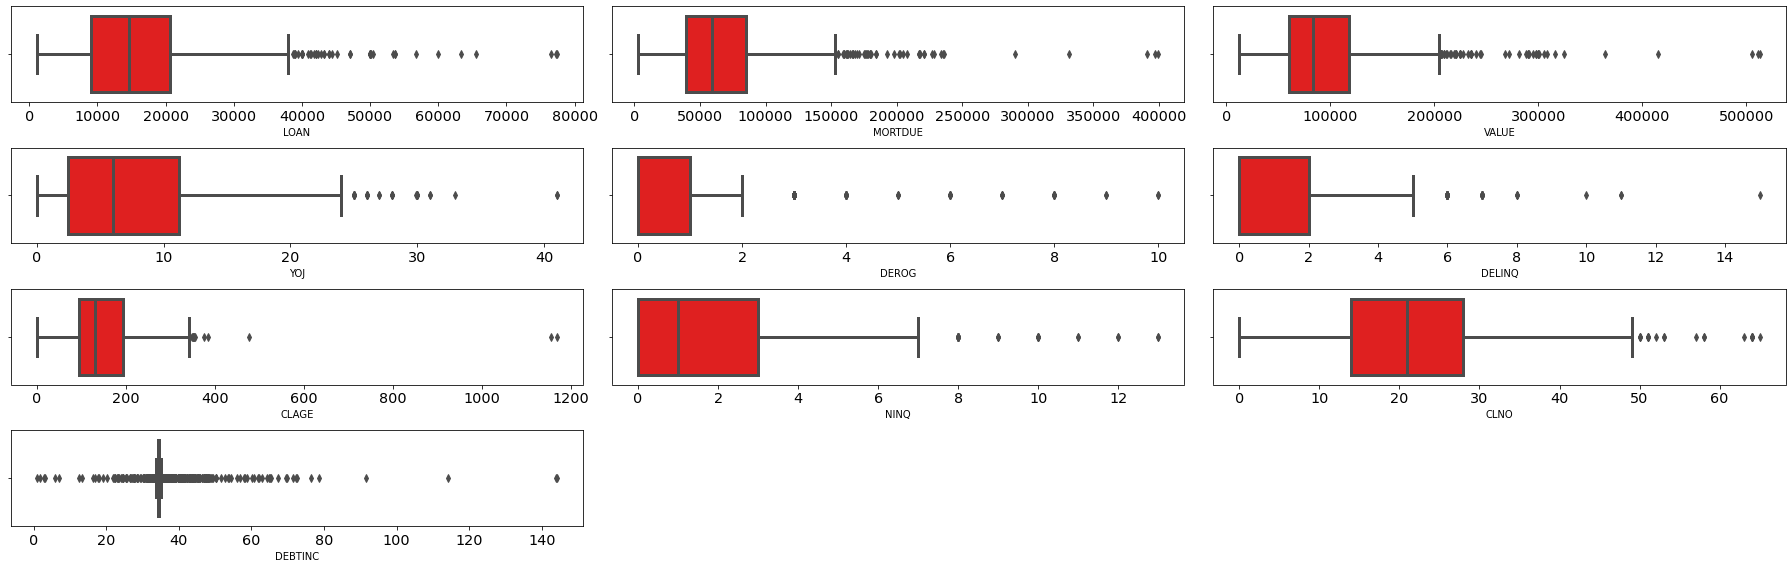

In [ ]:
for i in range(0,len(num1)):
  plt.subplot(4, int(len(num1)/3),i+1)
  sns.boxplot(yes[num1[i]],color = 'r', orient = 'h')
  plt.tight_layout()

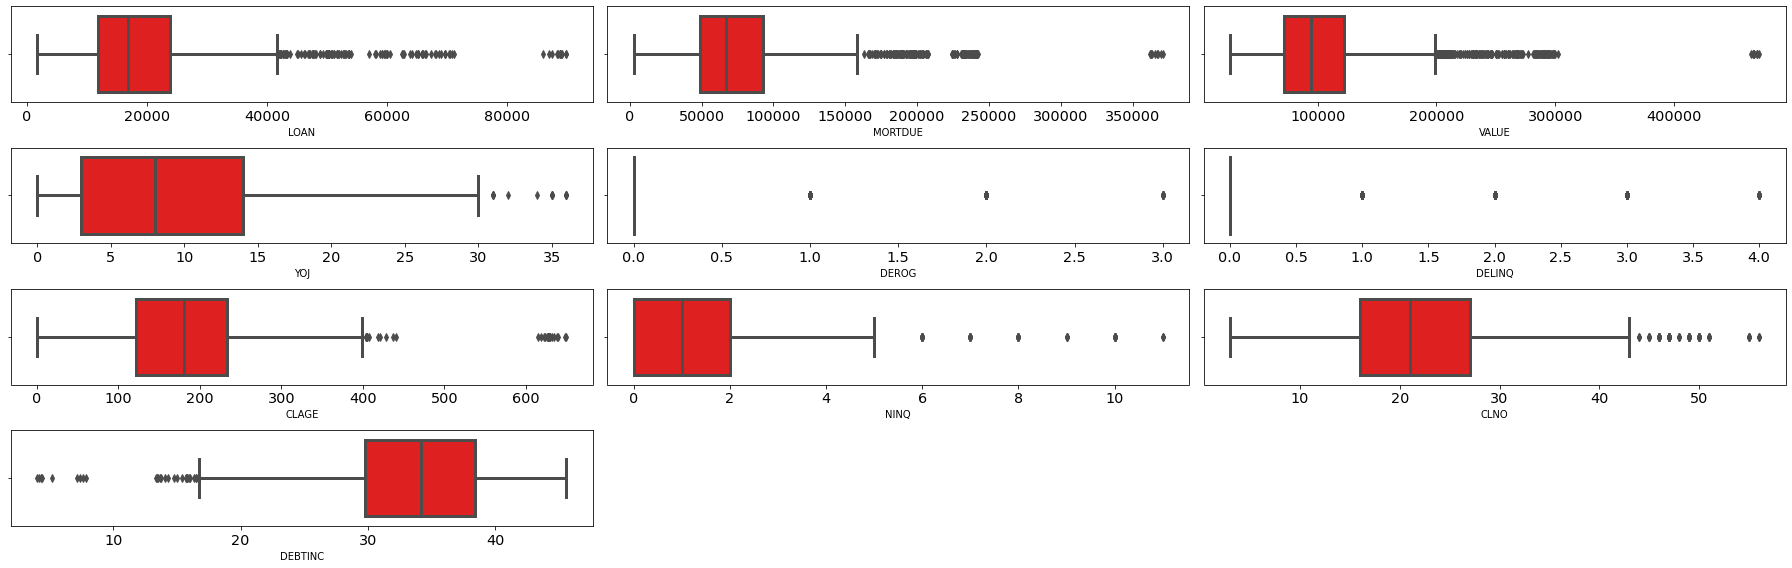

In [ ]:
for i in range(0,len(num1)):
  plt.subplot(4, int(len(num1)/3),i+1)
  sns.boxplot(no[num1[i]],color = 'r', orient = 'h')
  plt.tight_layout()

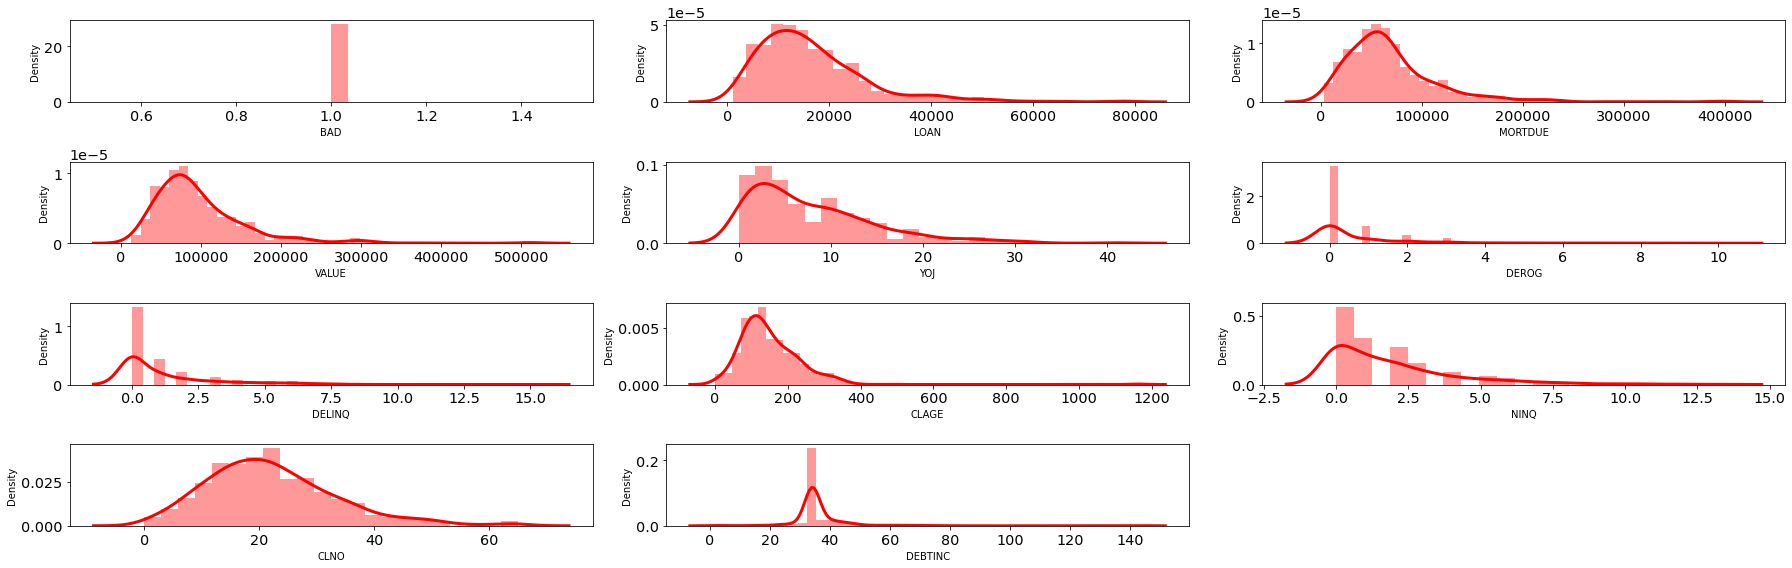

In [ ]:
# Distribusi data dari customer yang bermasalah

for i in range(0,len(num)):
  plt.subplot(4, int(len(num1)/3),i+1)
  sns.distplot(yes[num[i]],color = 'r')
  plt.tight_layout()

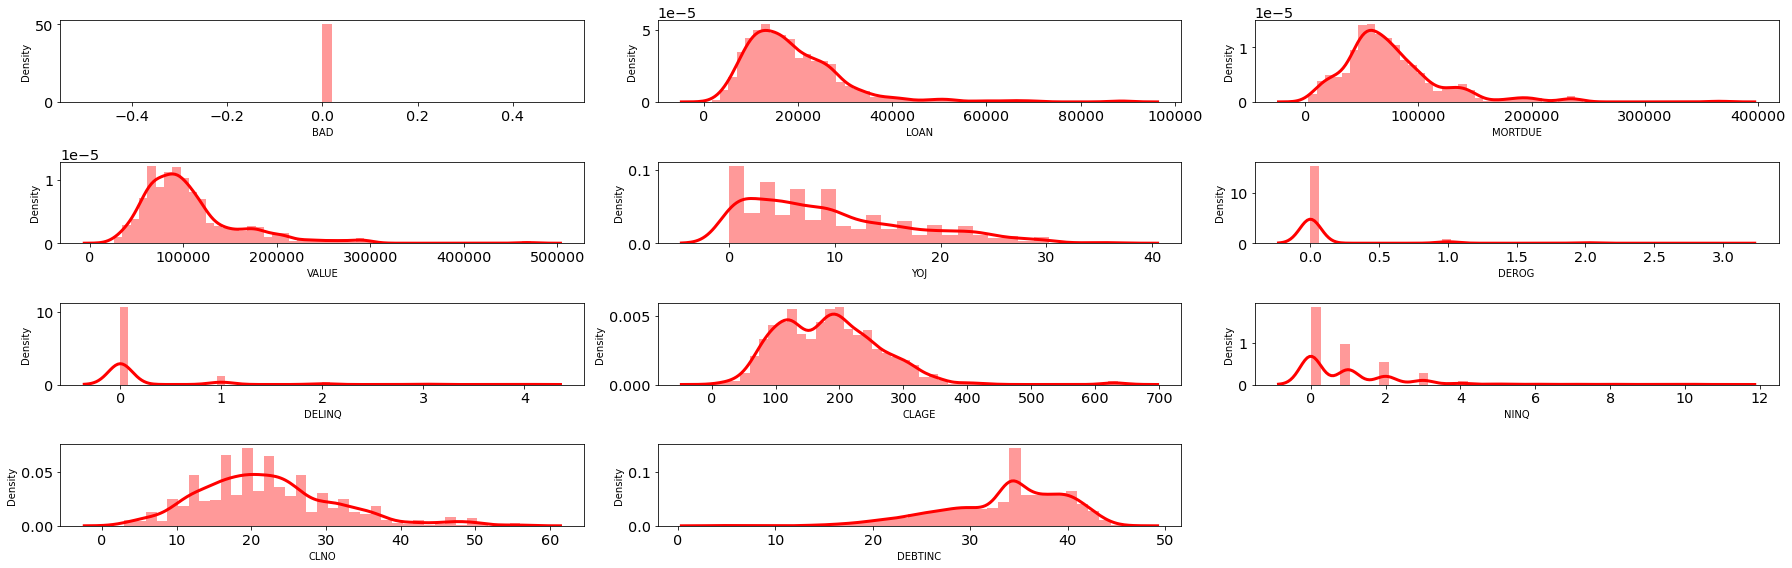

In [ ]:
# Distribusi data dari customer tidak bermasalah

for i in range(0,len(num)):
  plt.subplot(4, int(len(num1)/3),i+1)
  sns.distplot(no[num[i]],color = 'r')
  plt.tight_layout()

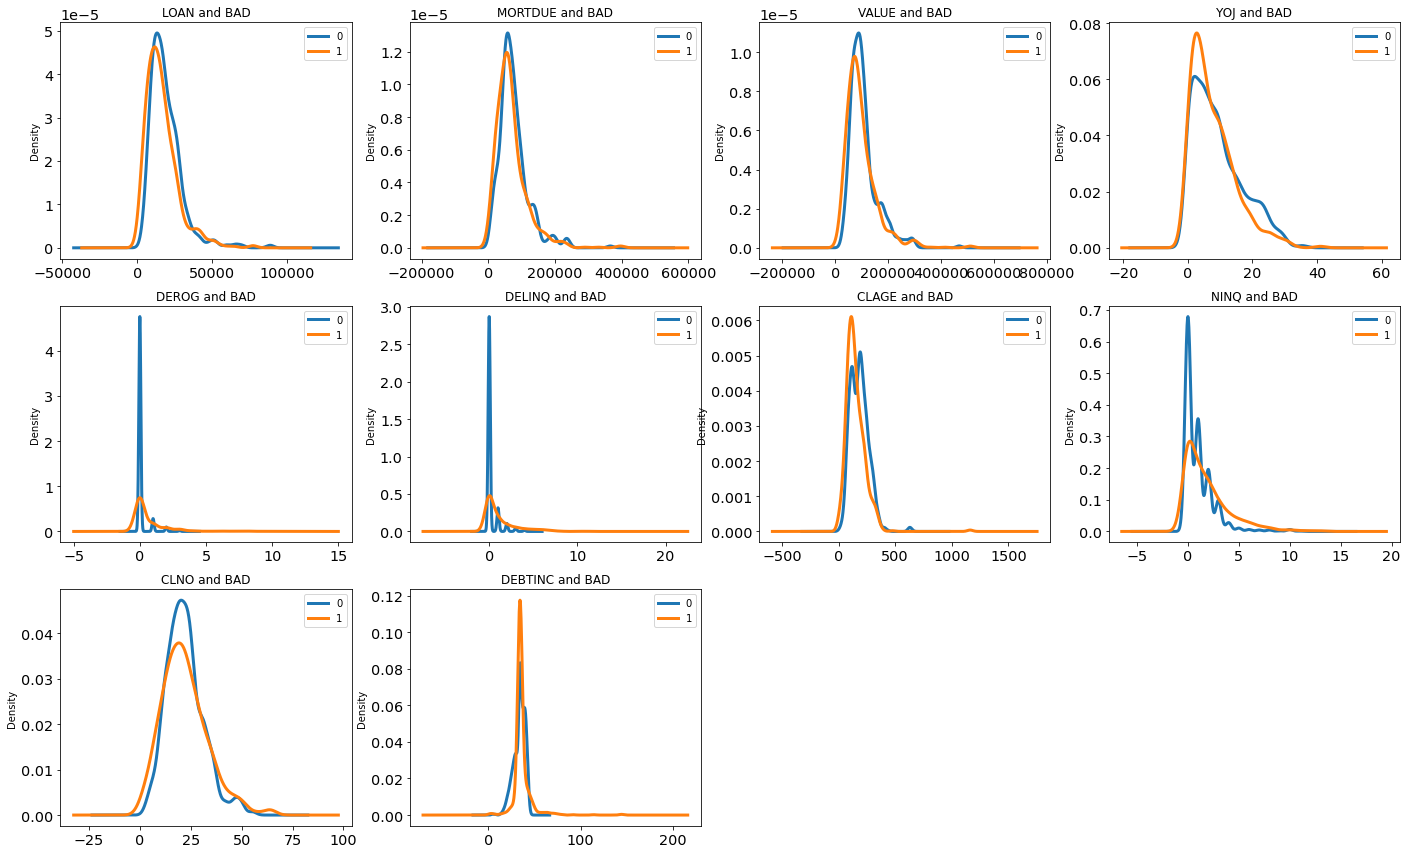

In [ ]:
columns = ['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG',
       'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC']
pos = 1
plt.figure(figsize=(24, 20))
for column in columns:
    plt.subplot(4, 4, pos)
    data.groupby('BAD')[column].plot.density(title= column + ' and BAD')
    plt.legend()
    pos = pos + 1

plt.show()

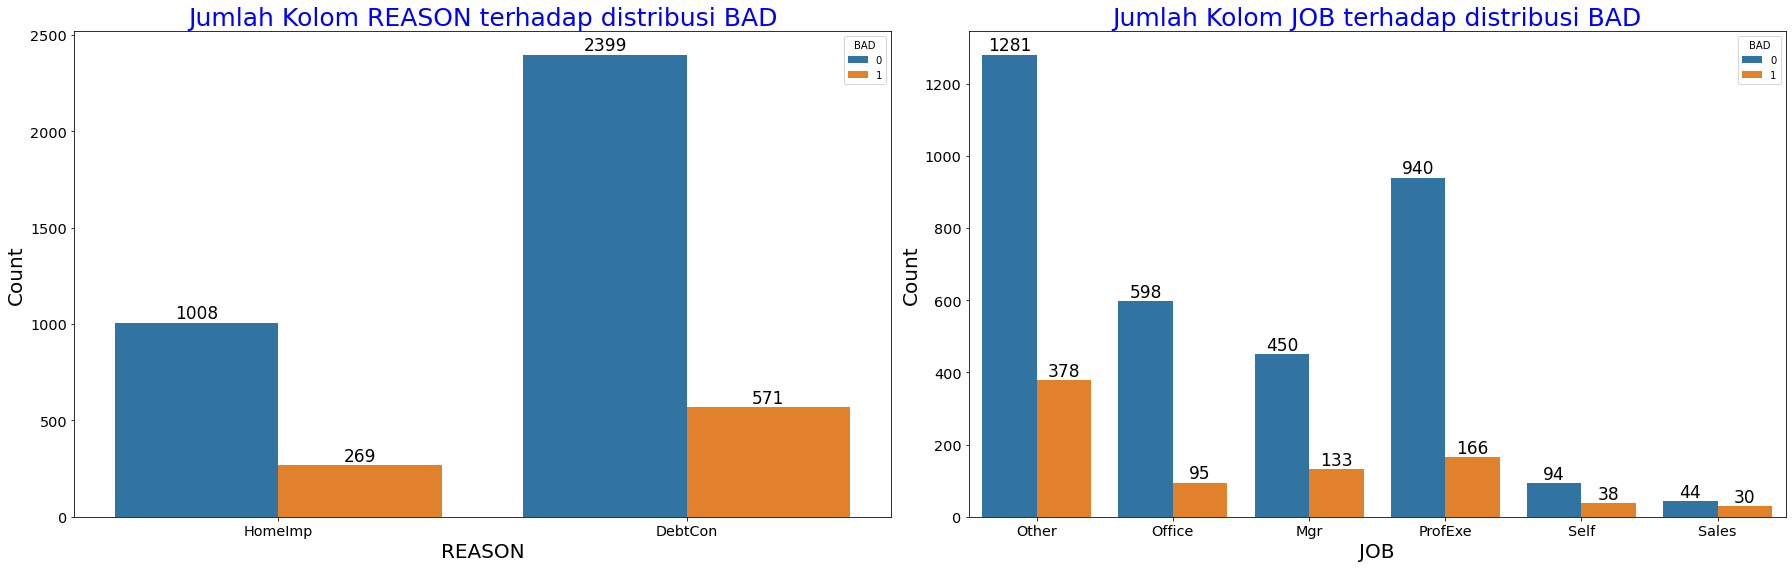

In [ ]:
for i in range(0, len(cat)):
    plt.subplot(1, 2, i+1)
    a = sns.countplot(data[cat[i]], hue=data['BAD'], 
                  orient='v')
    a.set_title('Jumlah Kolom '+ cat[i]+' terhadap distribusi BAD',fontsize= 25, color = 'blue')
    a.set_xlabel(cat[i],fontsize= 20)
    a.set_ylabel('Count', fontsize= 20)
    for container in a.containers:
      a.bar_label(container, fontsize=17)
        
plt.tight_layout()

In [ ]:
reason_mean = data.groupby('REASON')['LOAN'].mean().reset_index()
reason_median = data.groupby('REASON')['LOAN'].median().reset_index()

print(reason_mean)
print(reason_median)

    REASON          LOAN
0  DebtCon  19888.484848
1  HomeImp  15302.975724
    REASON   LOAN
0  DebtCon  17750
1  HomeImp  12800


(0.0, 21888.484848484848)

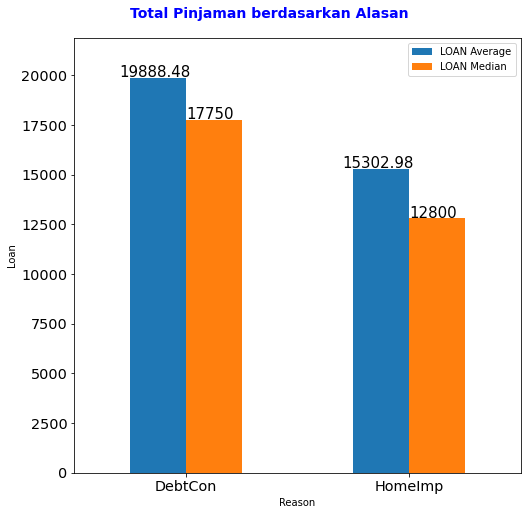

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(8,8))

a = [' Average',' Median']
x = 'REASON'
y = 'LOAN'

df = reason_mean.merge(reason_median, how='inner', on=x, suffixes=a)
val = max([df[y+sf].max() for sf in a])
df.plot.bar(x, subplots=False, rot=0, ax=ax, linewidth=2)

ax.set_ylabel('Loan')
ax.set_xlabel('Reason')
ax.text(x=1, y=val+3000, s='Total Pinjaman berdasarkan Alasan',
       horizontalalignment='right', color='blue', fontsize=14, fontweight='bold')

x_num = range(len(df[x]))
for i in x_num:
    ax.text(x=x_num[i]-0.3, y=df[y+a[0]][i]+50, s=round(df[y+a[0]][i], 2), size=15)
    ax.text(x=x_num[i]-0, y=df[y+a[1]][i]+50, s=round(df[y+a[1]][i], 2), size=15)

ax.set_ylim(0, val+2000)

- Rata-rata pinjaman dengan alasan **Membayar Hutang** adalah **19888.48**
  dengan Median-nya **17750**
- Rata-rata pinjaman dengan alasan **Renovasi rumah** adalah **15302.98**
  dengan Median-nya **12800**

In [ ]:
job_mean = data.groupby('JOB')['LOAN'].mean().reset_index()
job_median = data.groupby('JOB')['LOAN'].median().reset_index()

print(job_mean)
print(job_median)

       JOB          LOAN
0      Mgr  19522.469983
1   Office  17230.303030
2    Other  17333.815552
3  ProfExe  19248.734177
4    Sales  14725.675676
5     Self  31461.363636
       JOB   LOAN
0      Mgr  18700
1   Office  15100
2    Other  15000
3  ProfExe  17300
4    Sales  13650
5     Self  25550


(0.0, 33461.36363636363)

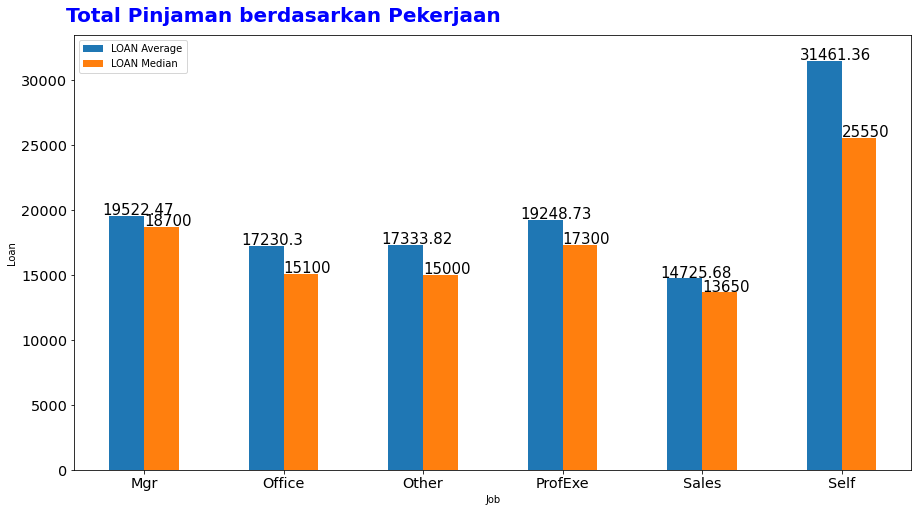

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(15,8))

a = [' Average',' Median']
x = 'JOB'
y = 'LOAN'

df1 = job_mean.merge(job_median, how='inner', on=x, suffixes=a)
val = max([df1[y+sf].max() for sf in a])
df1.plot.bar(x, subplots=False, rot=0, ax=ax, linewidth=2)

ax.set_ylabel('Loan')
ax.set_xlabel('Job')
ax.text(x=1, y=val+3000, s='Total Pinjaman berdasarkan Pekerjaan',
       horizontalalignment='center', color='blue', fontsize=20, fontweight='bold')

x_num = range(len(df1[x]))
for i in x_num:
    ax.text(x=x_num[i]-0.3, y=df1[y+a[0]][i]+80, s=round(df1[y+a[0]][i], 2), size=15)
    ax.text(x=x_num[i]-0, y=df1[y+a[1]][i]+80, s=round(df1[y+a[1]][i], 2), size=15)

ax.set_ylim(0, val+2000)

- Rata-rata orang dengan Pekerjaan **Mgr** meminjam sebanyak **19522.47** dan dengan Median **18700**
- Rata-rata orang dengan Pekerjaan **Office** meminjam sebanyak **17230.3** dan dengan Median **15100**
- Rata-rata orang dengan Pekerjaan **Other** meminjam sebanyak **17333.82** dan dengan Median **15000**
- Rata-rata orang dengan Pekerjaan **ProfEx**e meminjam sebanyak **19248.73** dan dengan Median **17300**
- Rata-rata orang dengan Pekerjaan **Sales** meminjam sebanyak **14725.68** dan dengan Median **13650**
- Rata-rata orang dengan Pekerjaan **Self** meminjam sebanyak **31461.36** dan dengan Median **25550**

  **Jumlah Pinjaman tertinggi terdapat pada orang dengan Pekerjaan Self**

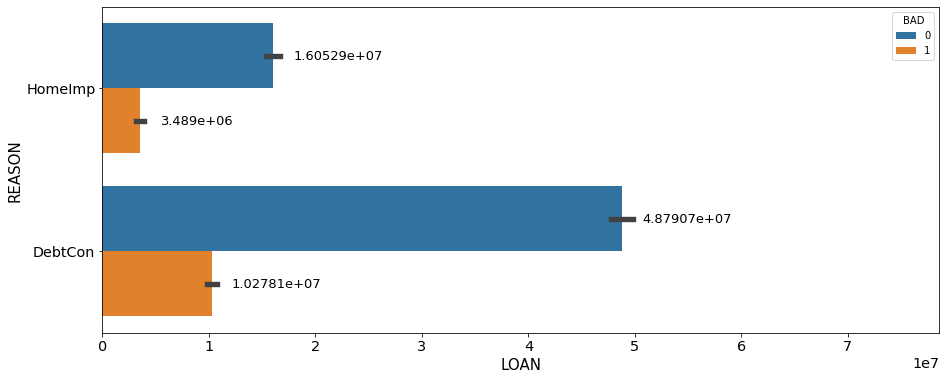

In [ ]:
plt.figure(figsize=(15,6))
a = sns.barplot(y='REASON',x='LOAN', data=data, estimator=sum, hue='BAD')
a.set_xlim(right= sum(data['LOAN']))
a.set_xlabel('LOAN', fontsize=15)
a.set_ylabel('REASON', fontsize=15)
for container in a.containers:
  a.bar_label(container,padding = 20, fontsize=13)

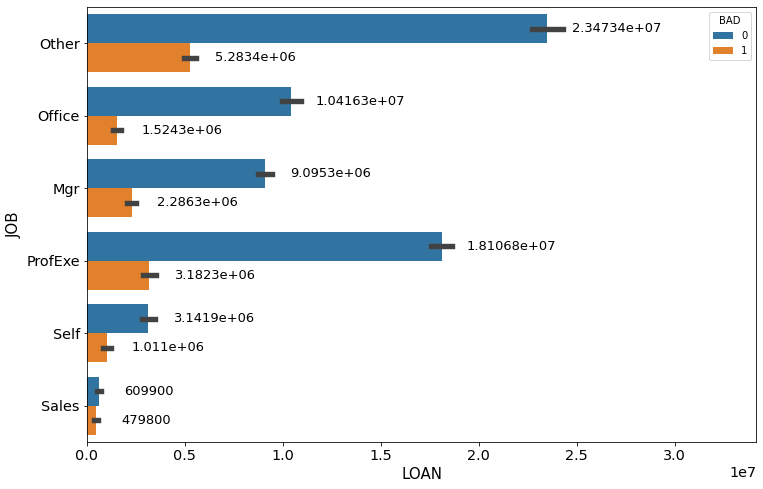

In [ ]:
plt.figure(figsize=(12,8))
a = sns.barplot(y='JOB',x='LOAN', data=data, estimator=sum, hue='BAD')
a.set_xlim(right= sum(data['LOAN']/2.3))
a.set_xlabel('LOAN',fontsize = 15)
a.set_ylabel('JOB',fontsize = 15)
for container in a.containers:
  a.bar_label(container, padding = 25, fontsize = 13)

Text(0.5, 1.0, 'PROPORSI BAD (%)')

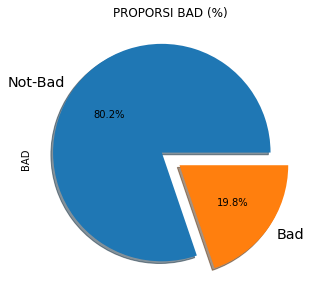

In [ ]:
labels = 'Not-Bad', 'Bad'
data['BAD'].value_counts().plot.pie(explode=[0.1,0.1],labels=labels, autopct='%1.1f%%',shadow=True,figsize=(5,5));
plt.title("PROPORSI BAD (%)")

Terdapat **19.8%** orang yang bermasalah dalam pelunasan Pinjaman

In [ ]:
HomeImp = data[data['REASON'] == 'HomeImp']
DebtCon = data[data['REASON'] == 'DebtCon']

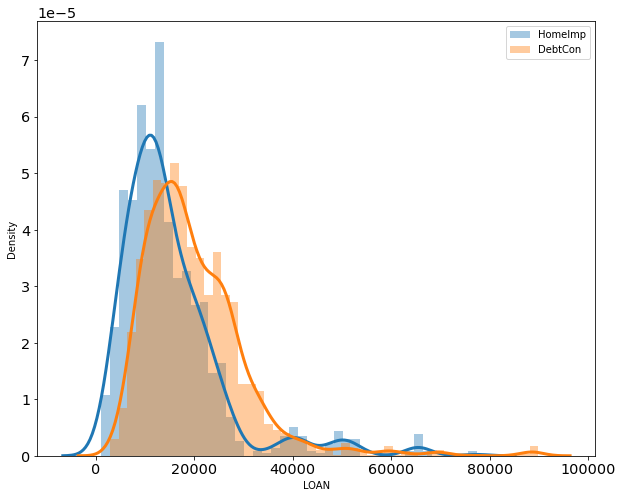

In [ ]:
plt.figure(figsize=(10,8))
sns.distplot(HomeImp['LOAN'], label='HomeImp')
sns.distplot(DebtCon['LOAN'], label='DebtCon')
plt.legend()
plt.show()

In [ ]:
Mgr = data[data['JOB'] == 'Mgr']
Office = data[data['JOB'] == 'Office']
Other = data[data['JOB'] == 'Other']
ProfEx = data[data['JOB'] == 'ProfEx']
Sales = data[data['JOB'] == 'Sales']
Self = data[data['JOB'] == 'Self']

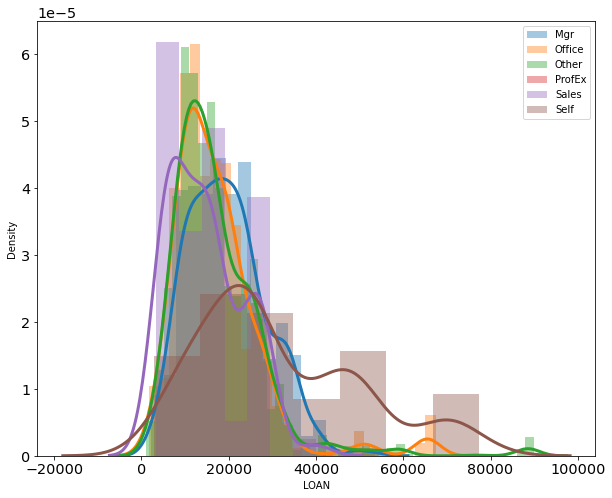

In [ ]:
plt.figure(figsize=(10,8))
sns.distplot(Mgr['LOAN'], label='Mgr')
sns.distplot(Office['LOAN'], label='Office')
sns.distplot(Other['LOAN'], label='Other')
sns.distplot(ProfEx['LOAN'], label='ProfEx')
sns.distplot(Sales['LOAN'], label='Sales')
sns.distplot(Self['LOAN'], label='Self')
plt.legend()
plt.show()

<AxesSubplot:>

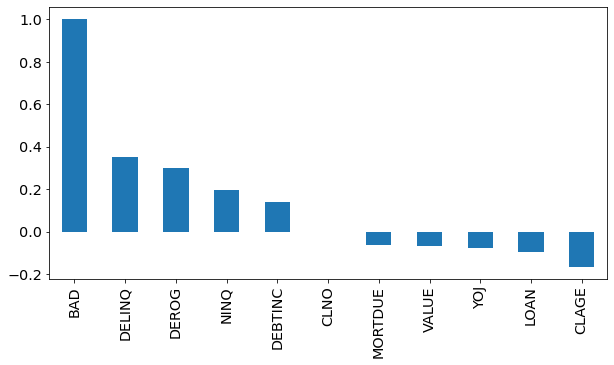

In [ ]:
plt.figure(figsize=(10,5))
data.corr()['BAD'].sort_values(ascending = False).plot(kind='bar')

<AxesSubplot:>

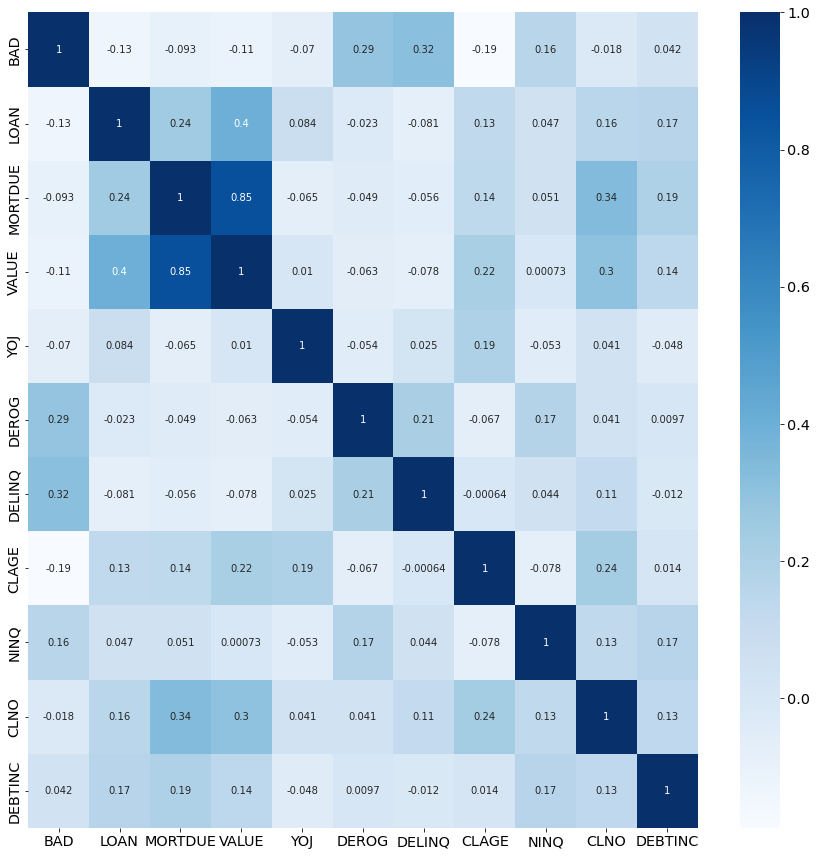

In [ ]:
plt.figure(figsize = (15,15))
sns.heatmap(data = data.corr(method = 'spearman'), annot= True, cmap= 'Blues')

# Handle Outlier

In [ ]:
from scipy import stats

print('Baris sebelum filter:', len(data))

filter = np.array([True]* len(data))
for col in ['LOAN', 'MORTDUE', 'VALUE',  'CLNO', 'YOJ', 'NINQ']:
  zscore = abs(stats.zscore(data[col]))
  filter = (zscore <3) & filter
data1 = data[filter]

print('Baris sesudah filter:', len(data1))

Baris sebelum filter: 4247
Baris sesudah filter: 3955


# Feature Encoding

In [ ]:
reason_enc = data.pivot_table(index = 'REASON',
                              values = ['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 
                                         'CLAGE', 'NINQ', 'CLNO', 'DEBTINC'],
                              aggfunc=[np.mean, np.median, np.amax])
reason_enc.head()

mean                        ...  amax                
              CLAGE       CLNO    DEBTINC  ...  NINQ     VALUE   YOJ
REASON                                     ...                      
DebtCon  175.003391  22.645118  34.213733  ...  13.0  512650.0  41.0
HomeImp  182.615612  20.916993  33.953388  ...   8.0  471827.0  31.0

[2 rows x 24 columns]

In [ ]:
reason_mean = reason_enc['mean'].reset_index()
reason_median = reason_enc['median'].reset_index()
reason_amax = reason_enc['amax'].reset_index()

Memberikan feature baru berupa nilai mean, median, dan max

In [ ]:
temp_name = []
for column in reason_mean:
  if column == 'REASON':
    temp_name.append(column)
  else :
    name = 'mean' + '_' + column
    temp_name.append(name)

reason_mean.columns = temp_name

In [ ]:
temp_name = []
for column in reason_median:
  if column == 'REASON':
    temp_name.append(column)
  else :
    name = 'median' + '_' + column
    temp_name.append(name)

reason_median.columns = temp_name

In [ ]:
temp_name = []
for column in reason_amax:
  if column == 'REASON':
    temp_name.append(column)
  else :
    name = 'amax' + '_' + column
    temp_name.append(name)

reason_amax.columns = temp_name

In [ ]:
reason_enc1 = pd.merge(reason_mean, reason_median, how='left', on='REASON')
reason_enc1 = pd.merge(reason_enc1, reason_amax, how='left', on='REASON')
reason_enc1.head()

,REASON,mean_CLAGE,mean_CLNO,mean_DEBTINC,mean_LOAN,mean_MORTDUE,mean_NINQ,mean_VALUE,mean_YOJ,median_CLAGE,median_CLNO,median_DEBTINC,median_LOAN,median_MORTDUE,median_NINQ,median_VALUE,median_YOJ,amax_CLAGE,amax_CLNO,amax_DEBTINC,amax_LOAN,amax_MORTDUE,amax_NINQ,amax_VALUE,amax_YOJ
0,DebtCon,175.003391,22.645118,34.213733,19888.484848,75019.528983,1.310438,105086.616017,8.708384,173.713393,21.5,34.135451,17750,66248.0,1.0,92306.5,7.0,1168.233561,65.0,144.189001,89900,399412.0,13.0,512650.0,41.0
1,HomeImp,182.615612,20.916993,33.953388,15302.975724,73531.924190,0.855129,106911.667682,9.754190,167.163736,20.0,34.135451,12800,63589.0,0.0,93500.0,8.0,649.747104,57.0,143.949605,77400,371003.0,8.0,471827.0,31.0


In [ ]:
datax = pd.merge(data, reason_enc1, how='left', on = 'REASON')
datax.sample(10)

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,mean_CLAGE,mean_CLNO,mean_DEBTINC,mean_LOAN,mean_MORTDUE,mean_NINQ,mean_VALUE,mean_YOJ,median_CLAGE,median_CLNO,median_DEBTINC,median_LOAN,median_MORTDUE,median_NINQ,median_VALUE,median_YOJ,amax_CLAGE,amax_CLNO,amax_DEBTINC,amax_LOAN,amax_MORTDUE,amax_NINQ,amax_VALUE,amax_YOJ
2775,0,20100,62661.0,87329.0,DebtCon,Other,18.0,0.0,0.0,198.341343,0.0,22.0,32.838178,175.003391,22.645118,34.213733,19888.484848,75019.528983,1.310438,105086.616017,8.708384,173.713393,21.5,34.135451,17750,66248.0,1.0,92306.5,7.0,1168.233561,65.0,144.189001,89900,399412.0,13.0,512650.0,41.0
1324,0,12500,79900.0,94660.0,DebtCon,Mgr,19.0,0.0,0.0,252.349698,10.0,24.0,35.800492,175.003391,22.645118,34.213733,19888.484848,75019.528983,1.310438,105086.616017,8.708384,173.713393,21.5,34.135451,17750,66248.0,1.0,92306.5,7.0,1168.233561,65.0,144.189001,89900,399412.0,13.0,512650.0,41.0
3384,1,25000,160000.0,220000.0,DebtCon,Other,7.0,0.0,6.0,228.066667,2.0,35.0,34.135451,175.003391,22.645118,34.213733,19888.484848,75019.528983,1.310438,105086.616017,8.708384,173.713393,21.5,34.135451,17750,66248.0,1.0,92306.5,7.0,1168.233561,65.0,144.189001,89900,399412.0,13.0,512650.0,41.0
689,0,9600,45158.0,55455.0,DebtCon,Other,15.0,0.0,0.0,82.713137,0.0,12.0,30.931518,175.003391,22.645118,34.213733,19888.484848,75019.528983,1.310438,105086.616017,8.708384,173.713393,21.5,34.135451,17750,66248.0,1.0,92306.5,7.0,1168.233561,65.0,144.189001,89900,399412.0,13.0,512650.0,41.0
695,0,9600,53196.0,63942.0,DebtCon,Other,16.0,0.0,4.0,227.563684,0.0,36.0,24.016770,175.003391,22.645118,34.213733,19888.484848,75019.528983,1.310438,105086.616017,8.708384,173.713393,21.5,34.135451,17750,66248.0,1.0,92306.5,7.0,1168.233561,65.0,144.189001,89900,399412.0,13.0,512650.0,41.0
607,1,9000,43881.0,56000.0,DebtCon,Other,5.0,0.0,3.0,73.033333,3.0,28.0,34.135451,175.003391,22.645118,34.213733,19888.484848,75019.528983,1.310438,105086.616017,8.708384,173.713393,21.5,34.135451,17750,66248.0,1.0,92306.5,7.0,1168.233561,65.0,144.189001,89900,399412.0,13.0,512650.0,41.0
566,1,8800,67200.0,80300.0,HomeImp,Other,10.0,4.0,1.0,135.866667,1.0,33.0,34.135451,182.615612,20.916993,33.953388,15302.975724,73531.924190,0.855129,106911.667682,9.754190,167.163736,20.0,34.135451,12800,63589.0,0.0,93500.0,8.0,649.747104,57.0,143.949605,77400,371003.0,8.0,471827.0,31.0
1826,1,15000,5500.0,29025.0,DebtCon,Other,25.0,0.0,5.0,275.500000,1.0,19.0,34.135451,175.003391,22.645118,34.213733,19888.484848,75019.528983,1.310438,105086.616017,8.708384,173.713393,21.5,34.135451,17750,66248.0,1.0,92306.5,7.0,1168.233561,65.0,144.189001,89900,399412.0,13.0,512650.0,41.0
3813,1,30000,17696.0,53100.0,DebtCon,Mgr,20.0,4.0,5.0,147.866667,0.0,28.0,34.135451,175.003391,22.645118,34.213733,19888.484848,75019.528983,1.310438,105086.616017,8.708384,173.713393,21.5,34.135451,17750,66248.0,1.0,92306.5,7.0,1168.233561,65.0,144.189001,89900,399412.0,13.0,512650.0,41.0
4226,0,69700,192163.0,293901.0,DebtCon,Self,10.0,0.0,0.0,222.147526,2.0,24.0,29.038236,175.003391,22.645118,34.213733,19888.484848,75019.528983,1.310438,105086.616017,8.708384,173.713393,21.5,34.135451,17750,66248.0,1.0,92306.5,7.0,1168.233561,65.0,144.189001,89900,399412.0,13.0,512650.0,41.0


<AxesSubplot:>

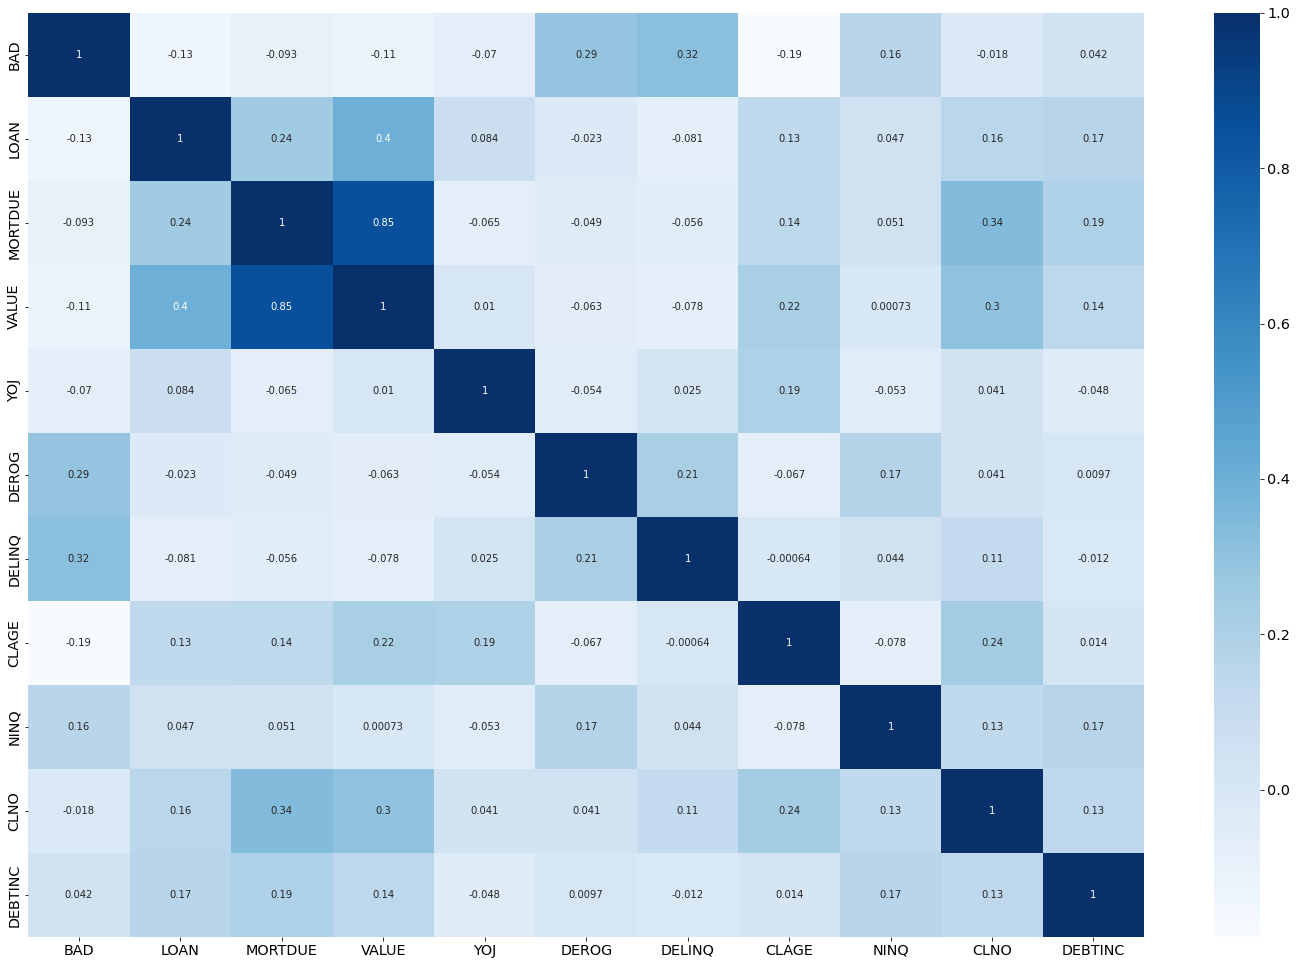

In [ ]:
 plt.figure(figsize = (25,17))
sns.heatmap(data = data.corr(method = 'spearman'), annot= True, cmap= 'Blues')

# Train Test Split

In [ ]:
datax.sample(10)

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,mean_CLAGE,mean_CLNO,mean_DEBTINC,mean_LOAN,mean_MORTDUE,mean_NINQ,mean_VALUE,mean_YOJ,median_CLAGE,median_CLNO,median_DEBTINC,median_LOAN,median_MORTDUE,median_NINQ,median_VALUE,median_YOJ,amax_CLAGE,amax_CLNO,amax_DEBTINC,amax_LOAN,amax_MORTDUE,amax_NINQ,amax_VALUE,amax_YOJ
3783,1,29000,72478.0,113000.0,DebtCon,Other,1.5,0.0,6.0,114.666667,4.0,12.0,34.135451,175.003391,22.645118,34.213733,19888.484848,75019.528983,1.310438,105086.616017,8.708384,173.713393,21.5,34.135451,17750,66248.0,1.0,92306.5,7.0,1168.233561,65.0,144.189001,89900,399412.0,13.0,512650.0,41.0
3324,1,24600,75636.0,112956.0,DebtCon,ProfExe,1.0,1.0,0.0,318.546165,3.0,42.0,34.135451,175.003391,22.645118,34.213733,19888.484848,75019.528983,1.310438,105086.616017,8.708384,173.713393,21.5,34.135451,17750,66248.0,1.0,92306.5,7.0,1168.233561,65.0,144.189001,89900,399412.0,13.0,512650.0,41.0
1730,0,14500,100685.0,129840.0,HomeImp,ProfExe,9.0,0.0,0.0,166.846396,2.0,32.0,27.527227,182.615612,20.916993,33.953388,15302.975724,73531.924190,0.855129,106911.667682,9.754190,167.163736,20.0,34.135451,12800,63589.0,0.0,93500.0,8.0,649.747104,57.0,143.949605,77400,371003.0,8.0,471827.0,31.0
310,1,7000,138841.0,160000.0,DebtCon,Mgr,11.0,8.0,0.0,86.200000,2.0,36.0,34.135451,175.003391,22.645118,34.213733,19888.484848,75019.528983,1.310438,105086.616017,8.708384,173.713393,21.5,34.135451,17750,66248.0,1.0,92306.5,7.0,1168.233561,65.0,144.189001,89900,399412.0,13.0,512650.0,41.0
2679,1,19500,100077.0,122352.0,DebtCon,Office,3.0,0.0,0.0,58.861027,0.0,9.0,38.121518,175.003391,22.645118,34.213733,19888.484848,75019.528983,1.310438,105086.616017,8.708384,173.713393,21.5,34.135451,17750,66248.0,1.0,92306.5,7.0,1168.233561,65.0,144.189001,89900,399412.0,13.0,512650.0,41.0
583,1,8900,64343.0,84013.0,DebtCon,Other,4.0,0.0,0.0,39.221719,0.0,12.0,35.788437,175.003391,22.645118,34.213733,19888.484848,75019.528983,1.310438,105086.616017,8.708384,173.713393,21.5,34.135451,17750,66248.0,1.0,92306.5,7.0,1168.233561,65.0,144.189001,89900,399412.0,13.0,512650.0,41.0
326,0,7100,64850.0,76985.0,HomeImp,Other,0.0,0.0,0.0,108.217190,0.0,7.0,36.337558,182.615612,20.916993,33.953388,15302.975724,73531.924190,0.855129,106911.667682,9.754190,167.163736,20.0,34.135451,12800,63589.0,0.0,93500.0,8.0,649.747104,57.0,143.949605,77400,371003.0,8.0,471827.0,31.0
2467,0,18100,95322.0,119643.0,HomeImp,Mgr,2.0,0.0,0.0,313.603387,1.0,20.0,42.119285,182.615612,20.916993,33.953388,15302.975724,73531.924190,0.855129,106911.667682,9.754190,167.163736,20.0,34.135451,12800,63589.0,0.0,93500.0,8.0,649.747104,57.0,143.949605,77400,371003.0,8.0,471827.0,31.0
29,1,3000,119826.0,193500.0,HomeImp,Other,8.0,0.0,0.0,130.033358,0.0,27.0,34.135451,182.615612,20.916993,33.953388,15302.975724,73531.924190,0.855129,106911.667682,9.754190,167.163736,20.0,34.135451,12800,63589.0,0.0,93500.0,8.0,649.747104,57.0,143.949605,77400,371003.0,8.0,471827.0,31.0
3840,0,30500,138082.0,181157.0,DebtCon,ProfExe,2.0,1.0,0.0,219.247307,1.0,19.0,40.874699,175.003391,22.645118,34.213733,19888.484848,75019.528983,1.310438,105086.616017,8.708384,173.713393,21.5,34.135451,17750,66248.0,1.0,92306.5,7.0,1168.233561,65.0,144.189001,89900,399412.0,13.0,512650.0,41.0


In [ ]:
from sklearn.model_selection import train_test_split

X = datax.drop(['BAD','REASON','JOB'], axis=1)
Y = datax['BAD']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=10)

In [ ]:
datax['BAD'].value_counts()

0    3407
1     840
Name: BAD, dtype: int64

Scalling dan fit data

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [ ]:
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)
X_train.head()

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,mean_CLAGE,mean_CLNO,mean_DEBTINC,mean_LOAN,mean_MORTDUE,mean_NINQ,mean_VALUE,mean_YOJ,median_CLAGE,median_CLNO,median_DEBTINC,median_LOAN,median_MORTDUE,median_NINQ,median_VALUE,median_YOJ,amax_CLAGE,amax_CLNO,amax_DEBTINC,amax_LOAN,amax_MORTDUE,amax_NINQ,amax_VALUE,amax_YOJ
0,-0.827311,1.239470,1.006161,0.119328,-0.275197,-0.374907,0.503070,-0.702512,-0.430950,-2.051419,1.550598,-1.550598,-1.550598,-1.550598,-1.550598,-1.550598,1.550598,1.550598,-1.550598,-1.550598,-7.105427e-15,-1.550598,-1.550598,-1.550598,1.550598,1.550598,-1.550598,-1.550598,-1.550598,-1.550598,-1.550598,-1.550598,-1.550598,-1.550598
1,6.231302,-0.411825,-0.345143,0.777977,-0.275197,-0.374907,0.525061,-0.702512,-0.639174,0.369408,-0.644913,0.644913,0.644913,0.644913,0.644913,0.644913,-0.644913,-0.644913,0.644913,0.644913,-7.105427e-15,0.644913,0.644913,0.644913,-0.644913,-0.644913,0.644913,0.644913,0.644913,0.644913,0.644913,0.644913,0.644913,0.644913
2,-0.763965,0.172308,-0.122661,-1.066240,-0.275197,-0.374907,-0.842148,-0.103583,1.026615,0.865794,-0.644913,0.644913,0.644913,0.644913,0.644913,0.644913,-0.644913,-0.644913,0.644913,0.644913,-7.105427e-15,0.644913,0.644913,0.644913,-0.644913,-0.644913,0.644913,0.644913,0.644913,0.644913,0.644913,0.644913,0.644913,0.644913
3,-0.302440,-0.206989,-0.211057,-1.066240,-0.275197,-0.374907,-0.337210,1.693204,-0.326838,-0.389951,-0.644913,0.644913,0.644913,0.644913,0.644913,0.644913,-0.644913,-0.644913,0.644913,0.644913,-7.105427e-15,0.644913,0.644913,0.644913,-0.644913,-0.644913,0.644913,0.644913,0.644913,0.644913,0.644913,0.644913,0.644913,0.644913
4,-0.709667,-0.166000,-0.428306,-0.934510,-0.275197,-0.374907,-1.058406,-0.702512,-1.680291,0.657825,1.550598,-1.550598,-1.550598,-1.550598,-1.550598,-1.550598,1.550598,1.550598,-1.550598,-1.550598,-7.105427e-15,-1.550598,-1.550598,-1.550598,1.550598,1.550598,-1.550598,-1.550598,-1.550598,-1.550598,-1.550598,-1.550598,-1.550598,-1.550598


In [ ]:
pd.Series(Y_train).value_counts()

0    2375
1     597
Name: BAD, dtype: int64

Over sampling dan under sampling

In [ ]:
from imblearn.over_sampling import SMOTE

over = SMOTE()
X_over, Y_over = over.fit_resample(X_train,Y_train)

In [ ]:
pd.Series(Y_over).value_counts()

1    2375
0    2375
Name: BAD, dtype: int64

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

under = RandomUnderSampler()
X_under, Y_under = under.fit_resample(X_train,Y_train)

In [ ]:
pd.Series(Y_under).value_counts()

1    597
0    597
Name: BAD, dtype: int64

# Test

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc

def multiclass_eval (y_true, y_pred, name=''):
    """
    Multiclass evaluation function. This function only focus on Accuracy,
    Recall and Precision of each class.
    
    Parameters
    ----------
    
    y_true:    array
        target of prediction
    
    y_pred:    array
        predicted target

    name:  String
        Name of Model
    
    Printed Information
    -------------------
    1. Confusion Matrix
    2. Accuracy
    3. Recall of each class
    4. Precision of each class
    5. AUC Score
    """
    cm = confusion_matrix(y_true, y_pred)
    # Number of Classes
    classes = cm.shape[0]

    # Define Placeholder
    true_vals = []
    actual_side = []
    pred_side = []
   
    # Loop to get the result
    for i in range(0, classes):
        true_vals.append(cm[i][i])
        actual_side.append(sum(cm[i]))
        pred_side.append(sum(cm.T[i]))
              
    # Accuracy
    accuracy = sum(true_vals) / sum(actual_side)
    print(name, 'Model Performance')
    print(cm, '\n')
    print('Accuracy          :', round(accuracy * 100, 1), '%')
    # AUC
    fpr, tpr, thresholds = roc_curve(y_true, y_pred, pos_label=1)
    print('AUC Class         :', round(auc(fpr,tpr)*100,1), '%')
    # Loop to get Recall and Precision
    for i in range(0, classes):
        print('\nClass', i, 'Overview:')
        recall    = true_vals[i] / actual_side[i]
        precision = true_vals[i] / pred_side[i]
        f1_score = (2 * precision * recall) / (precision + recall)
        print('Recall Class', i,'   :', round(recall * 100, 1), '%')
        print('Precision Class', i,':', round(precision * 100, 1), '%')
        print('F1 Score  Class', i,':', round(f1_score * 100, 1), '%')

def eval_classification(model, pred, xtrain, ytrain, xtest, ytest):
    print("Accuracy (Test Set): %.2f" % accuracy_score(ytest, pred))
    print("Precision (Test Set): %.2f" % precision_score(ytest, pred))
    print("Recall (Test Set): %.2f" % recall_score(ytest, pred))
    print("F1-Score (Test Set): %.2f" % f1_score(ytest, pred))
    
def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model, hyperparameters):
    for key, value in hyperparameters.items() :
        print('Best '+key+':', model.get_params()[key])

# TEST LOGREG

In [ ]:
# Logreg Training
logreg = LogisticRegression()
logreg.fit(X_over, Y_over)

LogisticRegression()

In [ ]:
y_pred_tr = logreg.predict(X_over)
y_pred_ts = logreg.predict(X_test)

In [ ]:
# Performance training
multiclass_eval(Y_over, y_pred_tr, name='Logreg - Training')

Logreg - Training Model Performance
[[1874  501]
 [ 789 1586]] 

Accuracy          : 72.8 %
AUC Class         : 72.8 %

Class 0 Overview:
Recall Class 0    : 78.9 %
Precision Class 0 : 70.4 %
F1 Score  Class 0 : 74.4 %

Class 1 Overview:
Recall Class 1    : 66.8 %
Precision Class 1 : 76.0 %
F1 Score  Class 1 : 71.1 %


In [ ]:
# Performance testing
multiclass_eval(Y_test, y_pred_ts, name='Logreg - Testing')

Logreg - Testing Model Performance
[[804 228]
 [ 66 177]] 

Accuracy          : 76.9 %
AUC Class         : 75.4 %

Class 0 Overview:
Recall Class 0    : 77.9 %
Precision Class 0 : 92.4 %
F1 Score  Class 0 : 84.5 %

Class 1 Overview:
Recall Class 1    : 72.8 %
Precision Class 1 : 43.7 %
F1 Score  Class 1 : 54.6 %


In [ ]:
eval_classification(logreg, y_pred_ts, X_over, Y_over, X_test, Y_test)

Accuracy (Test Set): 0.77
Precision (Test Set): 0.44
Recall (Test Set): 0.73
F1-Score (Test Set): 0.55


# TEST KNN OVER



In [ ]:
# KNN Training
KNN = KNeighborsClassifier()
KNN.fit(X_over, Y_over)

KNeighborsClassifier()

In [ ]:
y_pred_tr = KNN.predict(X_over)
y_pred_ts = KNN.predict(X_test)

In [ ]:
# Performance training
multiclass_eval(Y_over, y_pred_tr, name='KNN - Training')

KNN - Training Model Performance
[[2334   41]
 [  24 2351]] 

Accuracy          : 98.6 %
AUC Class         : 98.6 %

Class 0 Overview:
Recall Class 0    : 98.3 %
Precision Class 0 : 99.0 %
F1 Score  Class 0 : 98.6 %

Class 1 Overview:
Recall Class 1    : 99.0 %
Precision Class 1 : 98.3 %
F1 Score  Class 1 : 98.6 %


In [ ]:
# Performance testing
multiclass_eval(Y_test, y_pred_ts, name='KNN - Testing')

KNN - Testing Model Performance
[[1000   32]
 [  52  191]] 

Accuracy          : 93.4 %
AUC Class         : 87.8 %

Class 0 Overview:
Recall Class 0    : 96.9 %
Precision Class 0 : 95.1 %
F1 Score  Class 0 : 96.0 %

Class 1 Overview:
Recall Class 1    : 78.6 %
Precision Class 1 : 85.7 %
F1 Score  Class 1 : 82.0 %


In [ ]:
eval_classification(KNN, y_pred_ts, X_over, Y_over, X_test, Y_test)

Accuracy (Test Set): 0.93
Precision (Test Set): 0.86
Recall (Test Set): 0.79
F1-Score (Test Set): 0.82


In [ ]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

# TEST KNN UNDER

In [ ]:
# KNN Training
KNN = KNeighborsClassifier()
KNN.fit(X_under, Y_under)

KNeighborsClassifier()

In [ ]:
y_pred_tr = KNN.predict(X_under)
y_pred_ts = KNN.predict(X_test)

In [ ]:
# Performance training
multiclass_eval(Y_under, y_pred_tr, name='KNN - Training')

KNN - Training Model Performance
[[549  48]
 [118 479]] 

Accuracy          : 86.1 %
AUC Class         : 86.1 %

Class 0 Overview:
Recall Class 0    : 92.0 %
Precision Class 0 : 82.3 %
F1 Score  Class 0 : 86.9 %

Class 1 Overview:
Recall Class 1    : 80.2 %
Precision Class 1 : 90.9 %
F1 Score  Class 1 : 85.2 %


In [ ]:
# Performance testing
multiclass_eval(Y_test, y_pred_ts, name='KNN - Testing')

KNN - Testing Model Performance
[[840 192]
 [ 63 180]] 

Accuracy          : 80.0 %
AUC Class         : 77.7 %

Class 0 Overview:
Recall Class 0    : 81.4 %
Precision Class 0 : 93.0 %
F1 Score  Class 0 : 86.8 %

Class 1 Overview:
Recall Class 1    : 74.1 %
Precision Class 1 : 48.4 %
F1 Score  Class 1 : 58.5 %


In [ ]:
eval_classification(KNN, y_pred_ts, X_under, Y_under, X_test, Y_test)

Accuracy (Test Set): 0.80
Precision (Test Set): 0.48
Recall (Test Set): 0.74
F1-Score (Test Set): 0.59


# TEST DECTREE

In [ ]:
# DT Training
DT = DecisionTreeClassifier(random_state=10)
DT.fit(X_over, Y_over)

DecisionTreeClassifier(random_state=10)

In [ ]:
y_pred_tr = DT.predict(X_over)
y_pred_ts = DT.predict(X_test)

In [ ]:
# Performance training
multiclass_eval(Y_over, y_pred_tr, name='DT - Training')

DT - Training Model Performance
[[2375    0]
 [   0 2375]] 

Accuracy          : 100.0 %
AUC Class         : 100.0 %

Class 0 Overview:
Recall Class 0    : 100.0 %
Precision Class 0 : 100.0 %
F1 Score  Class 0 : 100.0 %

Class 1 Overview:
Recall Class 1    : 100.0 %
Precision Class 1 : 100.0 %
F1 Score  Class 1 : 100.0 %


In [ ]:
# Performance testing
multiclass_eval(Y_test, y_pred_ts, name='DT - Testing')

DT - Testing Model Performance
[[918 114]
 [ 78 165]] 

Accuracy          : 84.9 %
AUC Class         : 78.4 %

Class 0 Overview:
Recall Class 0    : 89.0 %
Precision Class 0 : 92.2 %
F1 Score  Class 0 : 90.5 %

Class 1 Overview:
Recall Class 1    : 67.9 %
Precision Class 1 : 59.1 %
F1 Score  Class 1 : 63.2 %


In [ ]:
eval_classification(DT, y_pred_ts, X_over, Y_over, X_test, Y_test)

Accuracy (Test Set): 0.85
Precision (Test Set): 0.59
Recall (Test Set): 0.68
F1-Score (Test Set): 0.63


# TEST RANFOR

In [ ]:
# RF Training
RF = RandomForestClassifier(random_state=10)
a = RF.fit(X_over, Y_over)
b = RF.fit(X_under, Y_under)

In [ ]:
y_pred_tr = RF.predict(X_over)
y_pred_ts = RF.predict(X_test)

In [ ]:
# Performance training
multiclass_eval(Y_over, y_pred_tr, name='RF - Training')

RF - Training Model Performance
[[2206  169]
 [ 130 2245]] 

Accuracy          : 93.7 %
AUC Class         : 93.7 %

Class 0 Overview:
Recall Class 0    : 92.9 %
Precision Class 0 : 94.4 %
F1 Score  Class 0 : 93.7 %

Class 1 Overview:
Recall Class 1    : 94.5 %
Precision Class 1 : 93.0 %
F1 Score  Class 1 : 93.8 %


In [ ]:
# Performance testing
multiclass_eval(Y_test, y_pred_ts, name='RF - Testing')

RF - Testing Model Performance
[[903 129]
 [ 31 212]] 

Accuracy          : 87.5 %
AUC Class         : 87.4 %

Class 0 Overview:
Recall Class 0    : 87.5 %
Precision Class 0 : 96.7 %
F1 Score  Class 0 : 91.9 %

Class 1 Overview:
Recall Class 1    : 87.2 %
Precision Class 1 : 62.2 %
F1 Score  Class 1 : 72.6 %


In [ ]:
eval_classification(RF, y_pred_ts, X_over, Y_over, X_test, Y_test)

Accuracy (Test Set): 0.87
Precision (Test Set): 0.62
Recall (Test Set): 0.87
F1-Score (Test Set): 0.73


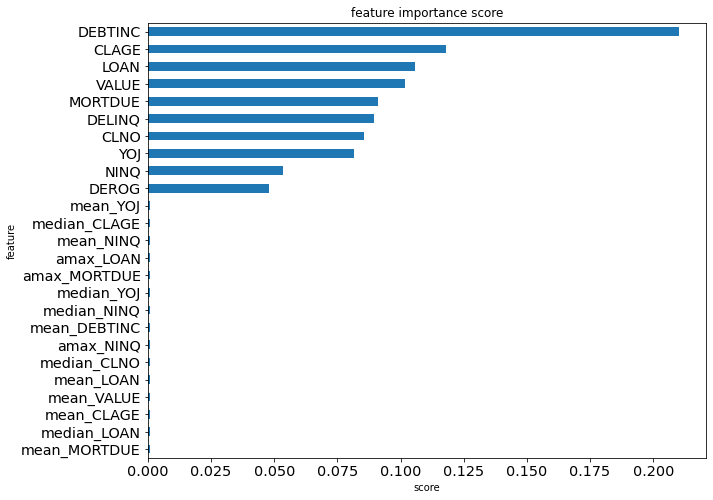

In [ ]:
show_feature_importance(RF)

# TEST SVM

In [ ]:
from sklearn import metrics
from sklearn.svm import SVC #MODEL SVM
logreg.svm = SVC(kernel='linear') 
logreg.svm.fit(X_over, Y_over)
preds = logreg.svm.predict(X_test)
multiclass_eval(Y_test, preds, name='SVM Linear - Testing')

SVM Linear - Testing Model Performance
[[827 205]
 [ 69 174]] 

Accuracy          : 78.5 %
AUC Class         : 75.9 %

Class 0 Overview:
Recall Class 0    : 80.1 %
Precision Class 0 : 92.3 %
F1 Score  Class 0 : 85.8 %

Class 1 Overview:
Recall Class 1    : 71.6 %
Precision Class 1 : 45.9 %
F1 Score  Class 1 : 55.9 %


In [ ]:
from sklearn.svm import SVC #MODEL SVM
logreg.svm = SVC(kernel='rbf') 
logreg.svm.fit(X_over, Y_over)
preds = logreg.svm.predict(X_test)
multiclass_eval(Y_test, preds, name='SVM rbf - Testing')

SVM rbf - Testing Model Performance
[[854 178]
 [ 54 189]] 

Accuracy          : 81.8 %
AUC Class         : 80.3 %

Class 0 Overview:
Recall Class 0    : 82.8 %
Precision Class 0 : 94.1 %
F1 Score  Class 0 : 88.0 %

Class 1 Overview:
Recall Class 1    : 77.8 %
Precision Class 1 : 51.5 %
F1 Score  Class 1 : 62.0 %


In [ ]:
from sklearn.svm import SVC #MODEL SVM
logreg.svm = SVC(kernel='poly') 
logreg.svm.fit(X_over, Y_over)
preds = logreg.svm.predict(X_test)
multiclass_eval(Y_test, preds, name='SVM rbf - Testing')

SVM rbf - Testing Model Performance
[[888 144]
 [ 80 163]] 

Accuracy          : 82.4 %
AUC Class         : 76.6 %

Class 0 Overview:
Recall Class 0    : 86.0 %
Precision Class 0 : 91.7 %
F1 Score  Class 0 : 88.8 %

Class 1 Overview:
Recall Class 1    : 67.1 %
Precision Class 1 : 53.1 %
F1 Score  Class 1 : 59.3 %


# TEST Boosting

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ab = AdaBoostClassifier(random_state=10)
ab.fit(X_over,Y_over)

Y_pred_ts = ab.predict(X_test)
multiclass_eval(Y_test, Y_pred_ts, name='RF - Testing')

RF - Testing Model Performance
[[879 153]
 [ 46 197]] 

Accuracy          : 84.4 %
AUC Class         : 83.1 %

Class 0 Overview:
Recall Class 0    : 85.2 %
Precision Class 0 : 95.0 %
F1 Score  Class 0 : 89.8 %

Class 1 Overview:
Recall Class 1    : 81.1 %
Precision Class 1 : 56.3 %
F1 Score  Class 1 : 66.4 %


In [ ]:
from xgboost import XGBClassifier
xg = XGBClassifier(random_state=10)
xg.fit(X_over,Y_over)

Y_pred_ts = xg.predict(X_test)
multiclass_eval(Y_test, Y_pred_ts, name='RF - Testing')

RF - Testing Model Performance
[[924 108]
 [ 46 197]] 

Accuracy          : 87.9 %
AUC Class         : 85.3 %

Class 0 Overview:
Recall Class 0    : 89.5 %
Precision Class 0 : 95.3 %
F1 Score  Class 0 : 92.3 %

Class 1 Overview:
Recall Class 1    : 81.1 %
Precision Class 1 : 64.6 %
F1 Score  Class 1 : 71.9 %


In [ ]:
#List Hyperparameters yang akan diuji
hyperparameters = dict(
                       n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 10)], # Jumlah subtree 
                       bootstrap = [True], # Apakah pakai bootstrapping atau tidak
                       criterion = ['gini','entropy'],
                       max_depth = [int(x) for x in np.linspace(10, 110, num = 11)],  # Maximum kedalaman tree
                       min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 10, num = 5)], # Jumlah minimum samples pada node agar boleh di split menjadi leaf baru
                       min_samples_leaf = [int(x) for x in np.linspace(start = 1, stop = 10, num = 5)], # Jumlah minimum samples pada leaf agar boleh terbentuk leaf baru
                       max_features = ['auto', 'sqrt', 'log2'], # Jumlah feature yg dipertimbangkan pada masing-masing split
                       n_jobs = [-1], # Core untuk parallel computation. -1 untuk menggunakan semua core
                      )

# Init
RF = RandomForestClassifier(random_state=10)
RF_tuned = RandomizedSearchCV(RF, hyperparameters, cv=7, random_state=10, scoring='roc_auc')
RF_tuned.fit(X_over, Y_over)

# Predict & Evaluation
y_pred_ts = RF_tuned.predict(X_test)#Check performa dari model
multiclass_eval(Y_test, y_pred_ts, name='RF - Testing')

RF - Testing Model Performance
[[985  47]
 [ 41 202]] 

Accuracy          : 93.1 %
AUC Class         : 89.3 %

Class 0 Overview:
Recall Class 0    : 95.4 %
Precision Class 0 : 96.0 %
F1 Score  Class 0 : 95.7 %

Class 1 Overview:
Recall Class 1    : 83.1 %
Precision Class 1 : 81.1 %
F1 Score  Class 1 : 82.1 %


In [ ]:
show_best_hyperparameter(RF_tuned.best_estimator_, hyperparameters)

Best n_estimators: 2000
Best bootstrap: True
Best criterion: entropy
Best max_depth: 20
Best min_samples_split: 8
Best min_samples_leaf: 1
Best max_features: sqrt
Best n_jobs: -1


# Parameter RF terbaik
bootstrap=True, criterion= 'entropy',max_depth= 20,
                             max_features= 'sqrt', min_samples_leaf= 1, 
                             min_samples_split= 8, n_estimators= 2000, n_jobs= -1

In [ ]:
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [ ]:
y_pred_prob = RF_tuned.predict_proba(X_test)[0:10]

y_pred_prob

array([[0.95600805, 0.04399195],
       [0.49005105, 0.50994895],
       [0.98626736, 0.01373264],
       [0.81938462, 0.18061538],
       [0.98094144, 0.01905856],
       [0.97114982, 0.02885018],
       [0.97892333, 0.02107667],
       [0.92434286, 0.07565714],
       [0.97262722, 0.02737278],
       [0.16294216, 0.83705784]])

In [ ]:
y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob of - Default (1)', 'Prob of - Repaid (0)'])

y_pred_prob_df

,Prob of - Default (1),Prob of - Repaid (0)
0,0.956008,0.043992
1,0.490051,0.509949
2,0.986267,0.013733
3,0.819385,0.180615
4,0.980941,0.019059
5,0.971150,0.028850
6,0.978923,0.021077
7,0.924343,0.075657
8,0.972627,0.027373
9,0.162942,0.837058


In [ ]:
y_pred1 = RF_tuned.predict_proba(X_test)[:, 1]

In [ ]:
y_pred1

array([0.04399195, 0.50994895, 0.01373264, ..., 0.75373521, 0.9123622 ,
       0.10025536])

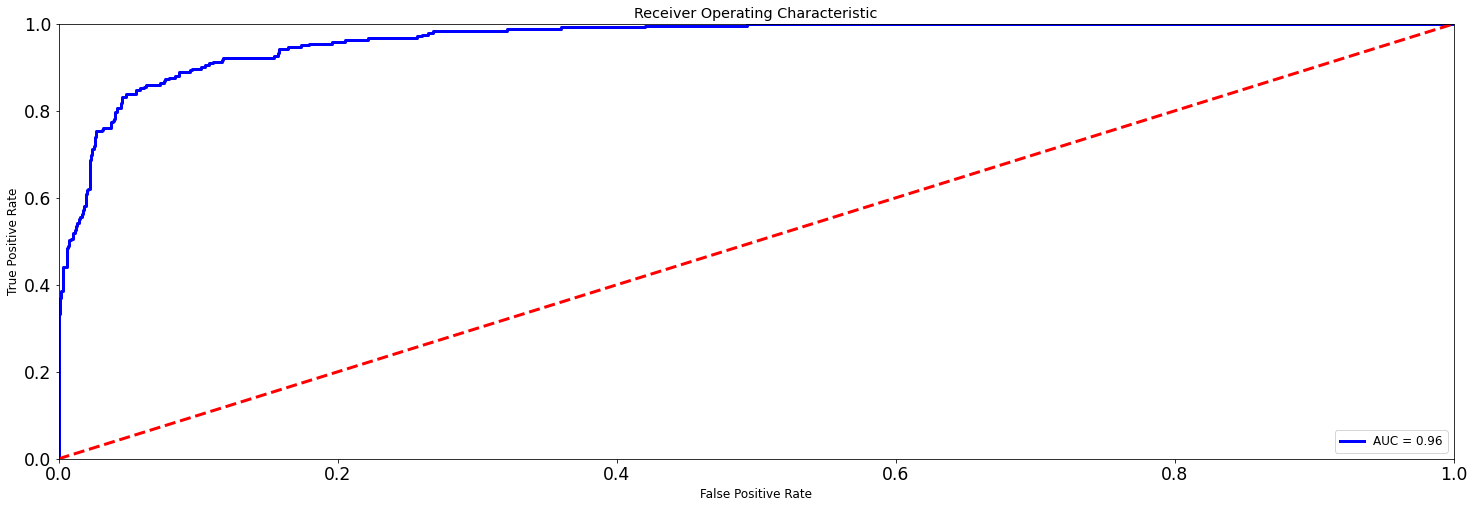

In [ ]:
fpr, tpr, threshold = metrics.roc_curve(Y_test, y_pred1)
roc_auc = metrics.auc(fpr, tpr)


plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
from sklearn.preprocessing import binarize

for i in range(1,9):
    
    cm1=0
    
    y_pred1 = RF_tuned.predict_proba(X_test)[:,1]
    
    y_pred1 = y_pred1.reshape(-1,1)
    
    y_pred2 = binarize(y_pred1, threshold = i/10)
    
    # y_pred2 = np.where(y_pred2 == 1, 'Yes', 'No')
    
    cm1 = confusion_matrix(Y_test, y_pred2)
        
    print ('With',i/10,'threshold the Confusion Matrix is ','\n\n',cm1,'\n\n',
           
            'with',cm1[0,0]+cm1[1,1],'correct predictions, ', '\n\n', 
           
            cm1[0,1],'Type I errors( False Positives), ','\n\n',
           
            cm1[1,0],'Type II errors( False Negatives), ','\n\n',
           
           'Accuracy score: ', (accuracy_score(Y_test, y_pred2)), '\n\n',
           
           'Sensitivity: ',cm1[1,1]/(float(cm1[1,1]+cm1[1,0])), '\n\n',
           
           'Specificity: ',cm1[0,0]/(float(cm1[0,0]+cm1[0,1])),'\n\n',
          
            '====================================================', '\n\n')

With 0.1 threshold the Confusion Matrix is  

 [[474 558]
 [  0 243]] 

 with 717 correct predictions,  

 558 Type I errors( False Positives),  

 0 Type II errors( False Negatives),  

 Accuracy score:  0.5623529411764706 

 Sensitivity:  1.0 

 Specificity:  0.45930232558139533 



With 0.2 threshold the Confusion Matrix is  

 [[736 296]
 [  4 239]] 

 with 975 correct predictions,  

 296 Type I errors( False Positives),  

 4 Type II errors( False Negatives),  

 Accuracy score:  0.7647058823529411 

 Sensitivity:  0.9835390946502057 

 Specificity:  0.7131782945736435 



With 0.3 threshold the Confusion Matrix is  

 [[869 163]
 [ 14 229]] 

 with 1098 correct predictions,  

 163 Type I errors( False Positives),  

 14 Type II errors( False Negatives),  

 Accuracy score:  0.8611764705882353 

 Sensitivity:  0.9423868312757202 

 Specificity:  0.8420542635658915 



With 0.4 threshold the Confusion Matrix is  

 [[946  86]
 [ 30 213]] 

 with 1159 correct predictions,  

 86 T

Digunakan threshold 0.4

In [ ]:
# Predict & Evaluation
y_pred2 = binarize(y_pred1, threshold = 0.4)
multiclass_eval(Y_test, y_pred2, name='RF - Testing')

RF - Testing Model Performance
[[946  86]
 [ 30 213]] 

Accuracy          : 90.9 %
AUC Class         : 89.7 %

Class 0 Overview:
Recall Class 0    : 91.7 %
Precision Class 0 : 96.9 %
F1 Score  Class 0 : 94.2 %

Class 1 Overview:
Recall Class 1    : 87.7 %
Precision Class 1 : 71.2 %
F1 Score  Class 1 : 78.6 %
